# Lab Work 3: Classification of Image Data

## 1. Loading the MNIST dataset
### 1.1. Acquiring the data using code below

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

/home/chris/WS2324/bda2/Praktikum/env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### 1.2. Assembling information 
#### 1.2.1. Number and size of the images

In [4]:
print("Number of images:", X.shape[0])
print("Image size:", X.shape[1])

Number of images: 70000
Image size: 784


Referring to the information, the MNIST dataset has a total of 70000 imgaes with 60000 training images and 10000 testing images. <br> <br>
The image size is 784 px², as the images in the dataset have been normalized to fit into a 28x28 pixel bounding box.

#### 1.2.2. Distribution among different classes

In [5]:
class_distribution = np.bincount(y.astype(int))
for digit, count in enumerate(class_distribution):
    print(f"{digit} has {count} images.")

0 has 6903 images.
1 has 7877 images.
2 has 6990 images.
3 has 7141 images.
4 has 6824 images.
5 has 6313 images.
6 has 6876 images.
7 has 7293 images.
8 has 6825 images.
9 has 6958 images.


It can be said that the distribution of the labels is fairly even, as none of them greatly outnumbers the other ones.

## 2 Visualizing the input data
#### The following plot displays ten random images for each class in the dataset, whilst also showing the class identity per image.

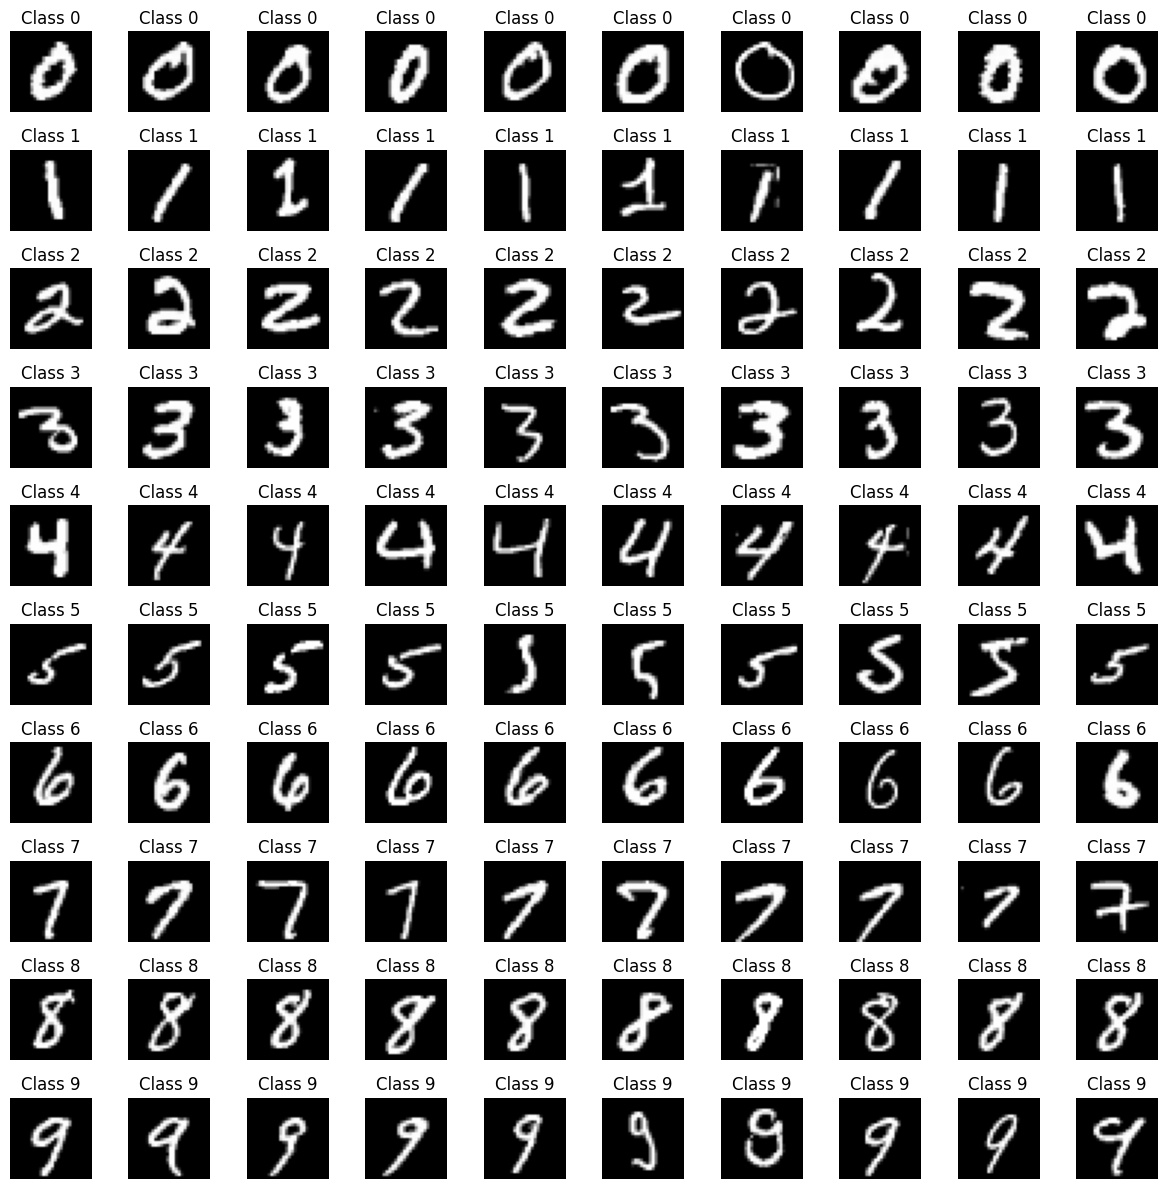

In [6]:
X = np.array(X)
y = np.array(y, dtype=int)
images_per_class = 10

fig, axes = plt.subplots(10, images_per_class, figsize=(12, 12))
for digit in range(10):
    
    # indices of images with the same label
    indices = np.where(y == digit)[0][:images_per_class]
    random_indices = np.random.choice(indices, size=images_per_class, replace=False)

    for i, index in enumerate(random_indices):
        image = X[index].reshape(28, 28)
        
        axes[digit, i].imshow(image, cmap='gray')
        axes[digit, i].axis('off')
        axes[digit, i].set_title(f"Class {digit}")

plt.tight_layout()
plt.show()

Looking at the results, the most noticeable discrepancies can be found for the numbers **1**, **7** and **3**, which have the highest number of images among all classes. <br>

This can be explained as a side effect of these three numbers *not having a universal way* of being handwritten.

### The following sections of this notebook cover the implementation and training of different types of classifiers with the goal of measuring their individual performance with the MNIST dataset.

## 3 KNeighbors Classifier

### 3.1. Importing of the required modules for [the classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and performance measurement

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 3.2. Training the classifier using 3-fold cross_validation 
#### 3.2.1. Creating a training and testing set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

#### 3.2.2. Training the classifer with `cross_validate`

In [9]:
scoring_metrics = ['accuracy'] # for all models

cv_results = cross_validate(knn_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)

for metric in scoring_metrics:
    print(f"Mean {metric} during cross-validation: {np.mean(cv_results['test_' + metric]):.2f}")

Mean accuracy during cross-validation: 0.96


#### Q: *What does cross_validate return?*

`cross_validate` returns a dictionary `(cv_results)`, containing various information about the cross-validation, such as training and test scores. In other words, a dictionary of arrays containing the score/time arrays for each run of the cross validation is returned.

The cv_results dictionary contains information about each fold's *test* scores for each specified metric. In the example, we calculate and display the *mean accuracy* across folds. 

#### 3.2.3. Calculation the euclidean distance between data points

In [26]:
test_point_indices = [1, 4]
selected_test_points = X_test[test_point_indices]
selected_labels = y_test[test_point_indices]

distances, indices = knn_classifier.kneighbors(selected_test_points)
euclidean_distances = np.sqrt(distances.flatten())
print("Euclidean distances:", euclidean_distances, sep="\n")

Euclidean distances:
[34.35120825 34.4321486  34.60074194 34.80769198 35.30992893 35.44399864
 35.71071095 35.7766509  36.23920341 36.39587829 28.98393434 29.82187352
 29.82595422 30.67684048 30.73766765 30.96785982 31.20237505 31.60614572
 31.76402711 32.00681087]


### 3.3. Using the best classifier from the previous run and checking with the test set 

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Fitting on the entire training set
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [20]:
report = classification_report(y_test, y_pred, output_dict=True)
# printed without output_dict=True to be more readable
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.94      0.99      0.97      1600
           2       0.97      0.95      0.96      1380
           3       0.96      0.96      0.96      1433
           4       0.98      0.97      0.97      1295
           5       0.96      0.96      0.96      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.96      1503
           8       0.99      0.92      0.95      1357
           9       0.95      0.96      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### The following metrics are important in the context of a classification report:

#### Precision
Precision is the ratio of *true positive predictions to the total predicted positives*. It measures **the accuracy of positive predictions**, indicating how many of the predicted positive instances are actually positive. <br> **High precision suggests low false positives.**

#### Recall (Sensitivity or True Positive Rate)
Recall is the ratio of *true positive predictions to the total actual positives*. It measures the ability of the model to **capture all the positive instances**. <br> **High recall suggests low false negatives.**

#### F1-Score
The F1-score is the *harmonic mean of precision and recall*. It provides a **balance between precision and recall**. It's particularly useful when there is an uneven class distribution.

#### Support
Support is the number of *actual occurrences of each class in the specified dataset*. It helps immensely in **understanding the distribution of the classes**.

#### Accuracy
Accuracy is the ratio of *correctly predicted instances to the total instances*. While accuracy is a common metric, it is **generally unsuitable for datasets where one class dominates**.

#### Macro Average
The macro average computes *the unweighted mean of precision, recall, and F1-score across all classes*. It treats **all classes equally**, regardless of size and distribution.


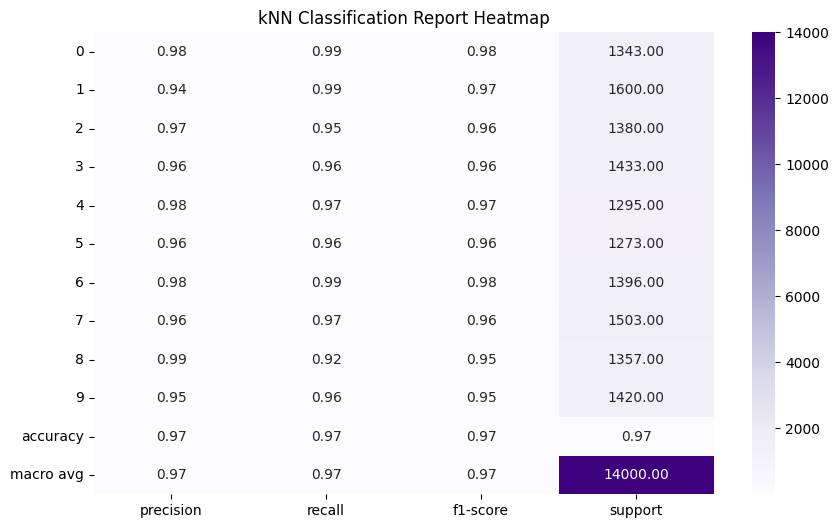

In [21]:
import seaborn as sns
import pandas as pd

# Convert classification report to ease plotting
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("kNN Classification Report Heatmap")
plt.show()

With high precision and recall scores overall, the `kNeighbors Classifier` model can be deemed a successful one.
Accurracy is also very high, even though the classes have a fairly even distribution.

It appears that the lowest **precision** score is 0.94 for the `1`, as it is the number with the most variable images. <br>
Regarding the lowest **recall** score, it is 0.92 for the `8`. This score could be interpreted as such that some images of `8` are falsely classified, most likely as a `3`.

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1329    1    5    0    1    2    3    1    1    0]
 [   0 1590    1    1    1    1    0    4    0    2]
 [  11   25 1310    1    2    3    5   16    3    4]
 [   0    6   12 1370    0   11    2   14    8   10]
 [   3    8    1    0 1254    0    1    3    1   24]
 [   4    7    0   16    1 1228   11    0    3    3]
 [   6    2    1    0    3    6 1378    0    0    0]
 [   1   25    5    0    3    0    0 1454    0   15]
 [   4   16    7   27    3   21    4   11 1250   14]
 [   5    7    2   10   16    1    1   18    2 1358]]


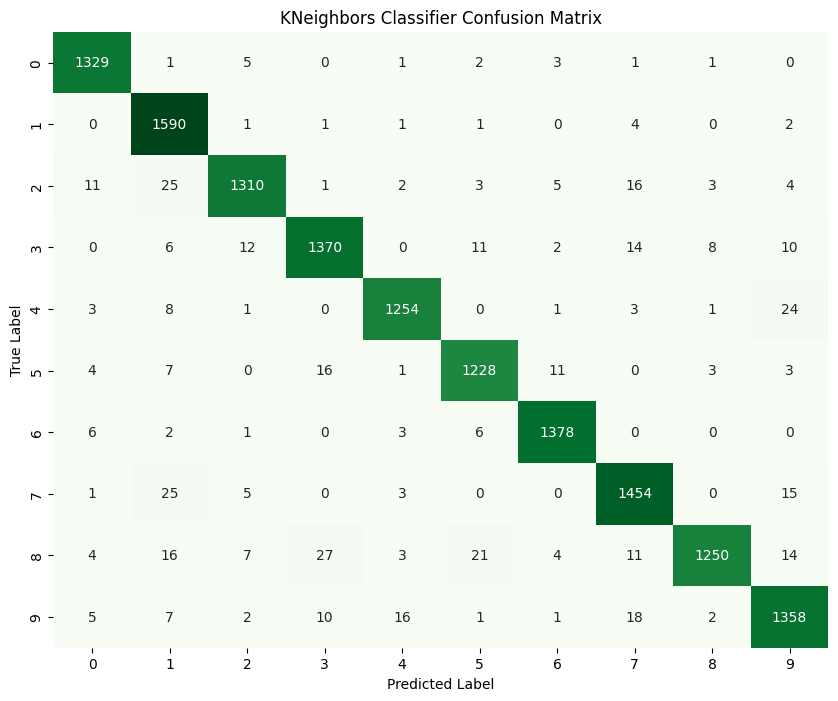

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("KNeighbors Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Looking at the confusion matrix, the trained KNeighbors Classifier does a good job at classifiying the numbers to their corresponding true labels with minimal errors. 

The relation to the false classification of certain classes can be directly linked to their *precision* and *recall* scores in the `classification report`.

## 4 Decision Tree Classifier

### 4.1. Importing of the required modules for [the classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and splitting the data into training and test sets.

In [62]:
from sklearn.tree import DecisionTreeClassifier

X = np.array(X)
y = np.array(y, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2. Training the classifier using 3-fold cross_validation

In [68]:
dt_classifier = DecisionTreeClassifier(random_state=42)
cross_val_scores = cross_validate(dt_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.3. Checking the performance with the test set

In [73]:
y_pred_dt = dt_classifier.predict(X_test)

dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.83      0.85      1380
           3       0.83      0.84      0.83      1433
           4       0.84      0.87      0.85      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.90      0.91      1503
           8       0.80      0.80      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000


Confusion Matrix (Decision Tree):
 [[1239    4   16    8    7   17   23    3   19    7]
 [   1 1520    7   12   13    4    6   11   22    4]
 [  21   20 1144   45   19   14   25   26   48   18]
 [  11

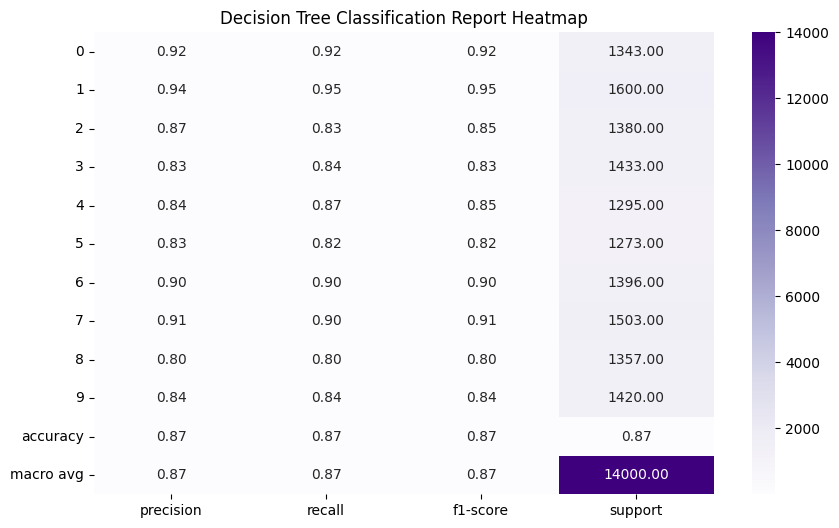

In [95]:
report_df = pd.DataFrame(dt_report).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("Decision Tree Classification Report Heatmap")
plt.show()

In comparisson to the scores of the kNeighbors Classifier this classifier isn't as effective. <br>
With the same number of occurrences for each class precision and recall scores are at `0.87`.

The classification of `5` and `8` in particular proves the hardest, as these labels have the lowest scores.

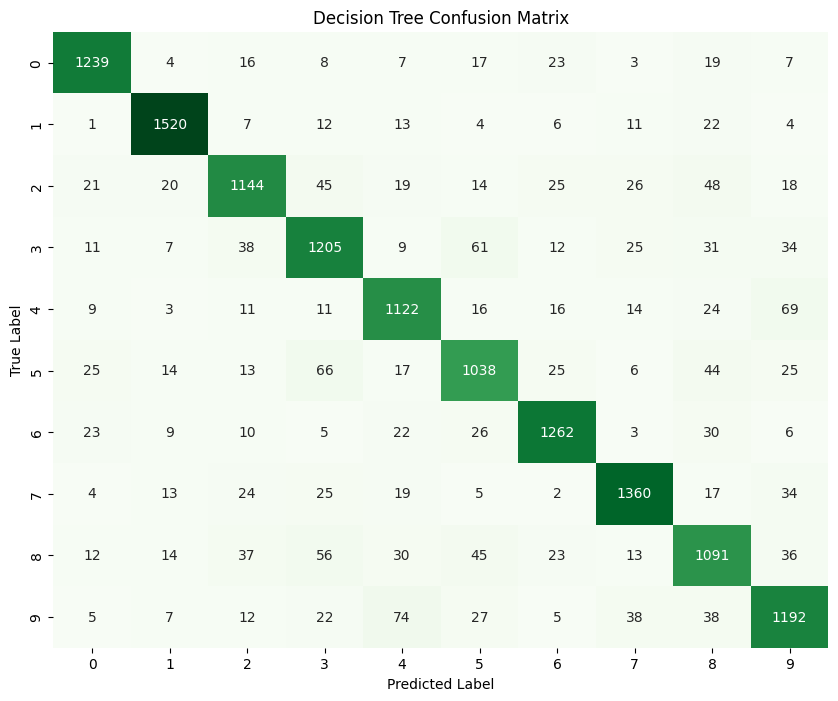

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

By looking at the confusion matrix, it is quite easy to spot the comparative ineffectiveness of the `DecisionTreeClassifier` model. <br>
Although it requires less time to train than the `KNeighborsClassifier`, there is *not a single label without false classifications*. 

## 5 Random Forest Classifier

### 5.1. Importing of the required modules for [the classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [80]:
from sklearn.ensemble import RandomForestClassifier

### 5.2. Training the classifier using 3-fold cross_validation

In [81]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cross_val_scores = cross_validate(rf_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

### 5.3. Checking the performance with the test set

In [82]:
# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf, output_dict=True)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Generate a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):\n", conf_matrix_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Confusion Matrix (Random Forest):
 [[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1

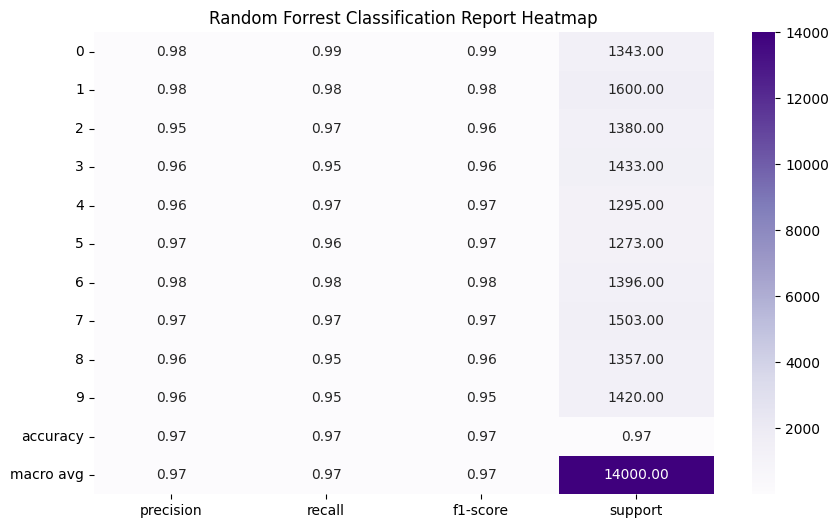

In [98]:
report_df = pd.DataFrame(classification_rep_rf).transpose()

# Plot classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("Random Forrest Classification Report Heatmap")
plt.show()

Looking at the classification report for the `Random Forrest Classifier`, the scores are very similar to those derived from the use of the `KNeighbors Classifier`. <br>
Consequently, since the MNIST dataset is a relatively small one, both classifiers should be able to do a decent classification job. <br> <br>
All things being equal, when putting an emphasis on predictive accuracy, as is the case for this classification, the `Random Forrest Classifier` is a better choice.

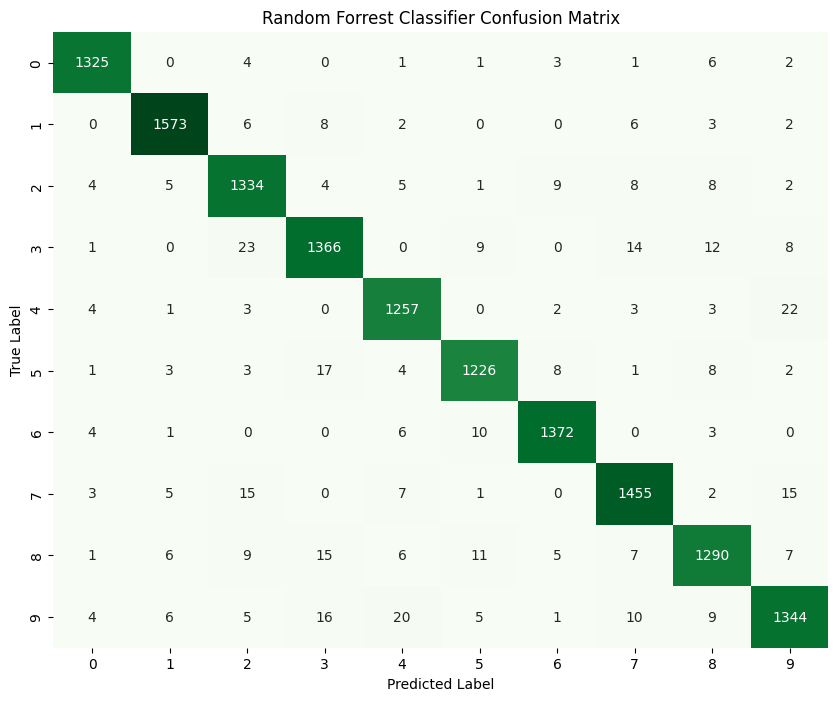

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Random Forrest Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

When comparing the confusion matrices for both the `KNeighbors Classifier` and `Random Forrest Classifier`, they seem rather similar. <br> <br>
Upon closer inspection, however, the number of false classifications (both false positives and false negatives) differs ever so slightly with the `Random Forrest Classifier` having better performance. This difference is bound to become more noticeable when handling larger datesets with more dimensions.

## 6 Gradient Boosting Classifier (Random Forests)

### 6.1. Importing of the required modules for [the classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and splitting the data into training and test sets.

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

As opposed to the other models with a training size of `0.80`, this classifier has a training size of `0.75`, which may impact the performance later on.

### 6.2. Training the classifier using 3-fold cross_validation

In [87]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
cross_val_scores = cross_validate(gb_classifier, X_train, y_train, cv=3, scoring=scoring_metrics)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [88]:
y_pred_gb = gb_classifier.predict(X_test)

### 6.3. Checking the performance with the test set

In [89]:
classification_rep_gb = classification_report(y_test, y_pred_gb, output_dict=True)
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix (Gradient Boosting):\n", conf_matrix_gb)

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1715
           1       0.97      0.98      0.97      1971
           2       0.93      0.93      0.93      1786
           3       0.94      0.91      0.92      1763
           4       0.93      0.94      0.94      1676
           5       0.93      0.92      0.93      1593
           6       0.96      0.96      0.96      1710
           7       0.95      0.93      0.94      1837
           8       0.91      0.93      0.92      1713
           9       0.90      0.91      0.91      1736

    accuracy                           0.94     17500
   macro avg       0.94      0.94      0.94     17500
weighted avg       0.94      0.94      0.94     17500


Confusion Matrix (Gradient Boosting):
 [[1677    0    2    3    4    7    8    2   12    0]
 [   0 1935   11    5    3    3    2    5    5    2]
 [   4    9 1669   19   17    3   11   15   35    4

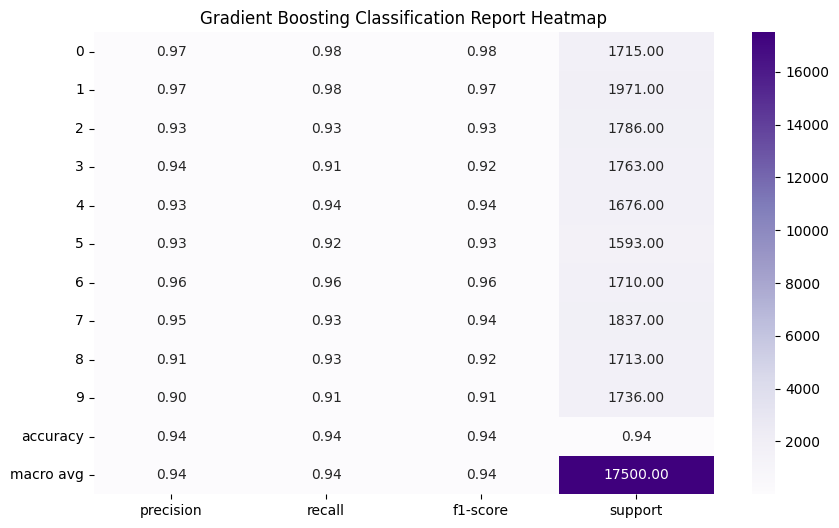

In [100]:
report_df = pd.DataFrame(classification_rep_gb).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="Purples", fmt=".2f")
plt.title("Gradient Boosting Classification Report Heatmap")
plt.show()

The classification report for the `Gradient Boosting Classifier` indicates strong overall performance with an accuracy of `0.94`. Precision, recall, and F1-score metrics demonstrate consistently high values across multiple classes, suggesting a well-balanced model. <br> <br> The macro and weighted averages also reinforce the classifier's effectiveness, affirming its capability to generalize well to diverse classes.

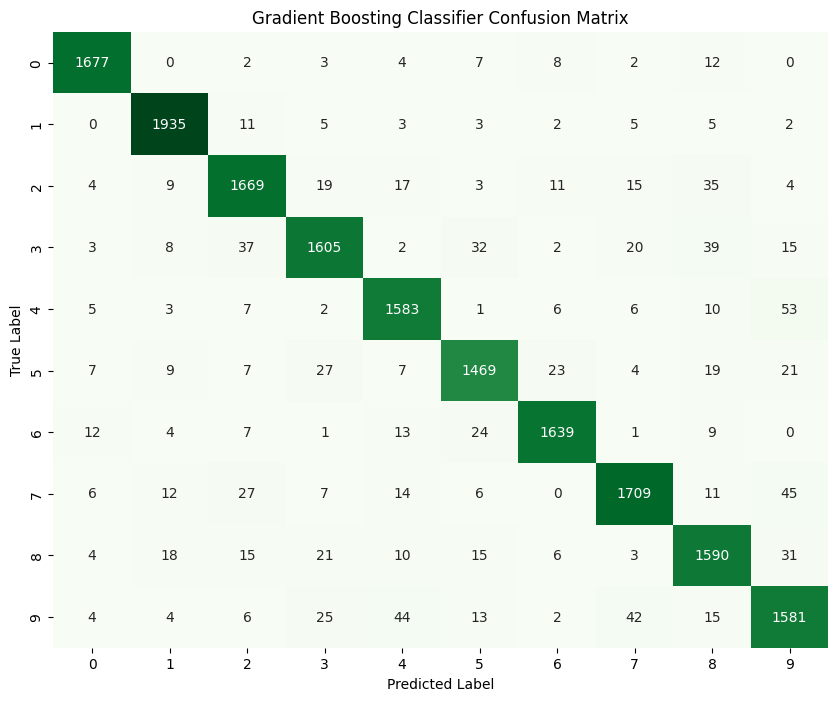

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

As for the confusion matrix, it shows the model's performance across different classes. The majority of instances are correctly classified, as evident from the high values on the diagonal, suggesting overall good performance. <br> In comparisson to the `Random Forrest Classifier` or even the `KNeighbors Classifier` the scores are lower, indicating that a smaller training size proves ineffective.

# Conclusion

In the classification of image data using the MNIST dataset, multiple classifiers were employed, including `KNeighbors`, `Decision Tree`, `Random Forests`, and `Gradient Boosting` classifiers. Notably, Random Forests and KNeighbors demonstrated the best performance, showcasing robust classification accuracy. Gradient Boosting closely followed, while Decision Tree exhibited comparatively lower performance. <br> <br> 
The visual representation of classification reports and confusion matrices provides a comprehensive overview of the models' classification results, aiding in the assessment and comparison of their overall performance. <br> <br>
Out of the two best performers, using the `KNeighbors Classifier` for simplicity and good performance on small to medium-sized datasets is a valid option. 
The `Random Forests Classifier` is preferable for larger datasets and situations where requirements like robust performance as well as adaptability to various data types, but less sensitivity to hyperparameters are crucial.